<a href="https://colab.research.google.com/github/gayu44712-ux/SCT_DS_04/blob/main/accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving accident.csv to accident.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['accident.csv']))

In [ ]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (2533, 16)


,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Number of Casualties,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1112091,429175,431904,2,1,01/01/2014,1840,6,2,4,2,1,3,1,58,9
1,1180869,430429,431025,3,2,08/01/2014,1430,1,2,1,1,1,3,1,69,9
2,1180869,430429,431025,3,2,08/01/2014,1430,1,2,1,1,1,3,2,41,9
3,11A0238,424660,427582,3,2,10/01/2014,817,1,1,1,1,1,3,1,35,9
4,11A0238,424660,427582,3,2,10/01/2014,817,1,1,1,1,1,3,1,25,9


In [ ]:
print("Column names:", df.columns.tolist())


Column names: ['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Number of Casualties', 'Accident Date', 'Time (24hr)', '1st Road Class', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty', 'Type of Vehicle']


In [ ]:
!pip install pyproj


In [ ]:
import pandas as pd
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:27700", "epsg:4326")
df = df.dropna(subset=['Grid Ref: Easting', 'Grid Ref: Northing'])
latitudes = []
longitudes = []

for east, north in zip(df['Grid Ref: Easting'], df['Grid Ref: Northing']):
    lat, lon = transformer.transform(north, east)
    latitudes.append(lat)
    longitudes.append(lon)

df['Latitude'] = latitudes
df['Longitude'] = longitudes

print(df[['Latitude', 'Longitude']].head())


    Latitude  Longitude
0  53.757963  -1.517579
1  53.769287  -1.530785
2  53.769287  -1.530785
3  53.717629  -1.583532
4  53.717629  -1.583532


In [ ]:
import folium
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=8)
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.4
    ).add_to(accident_map)

accident_map


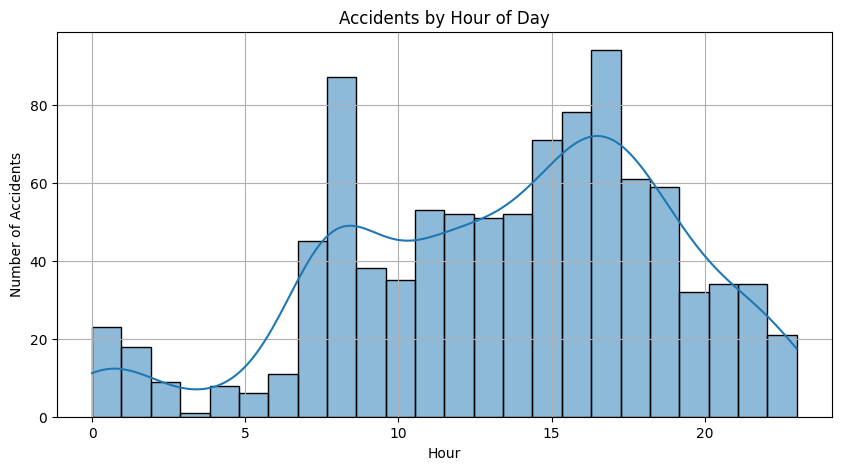

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/accident.csv')
df = df.dropna(subset=['Accident Date', 'Time (24hr)'])
df['Time (24hr)'] = df['Time (24hr)'].astype(int).astype(str).str.zfill(4)
df['Time (24hr)'] = df['Time (24hr)'].str[:2] + ':' + df['Time (24hr)'].str[2:]
df['Datetime'] = pd.to_datetime(df['Accident Date'] + ' ' + df['Time (24hr)'], errors='coerce')
df = df.dropna(subset=['Datetime'])
df['Hour'] = df['Datetime'].dt.hour
df['Weekday'] = df['Datetime'].dt.day_name()
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()


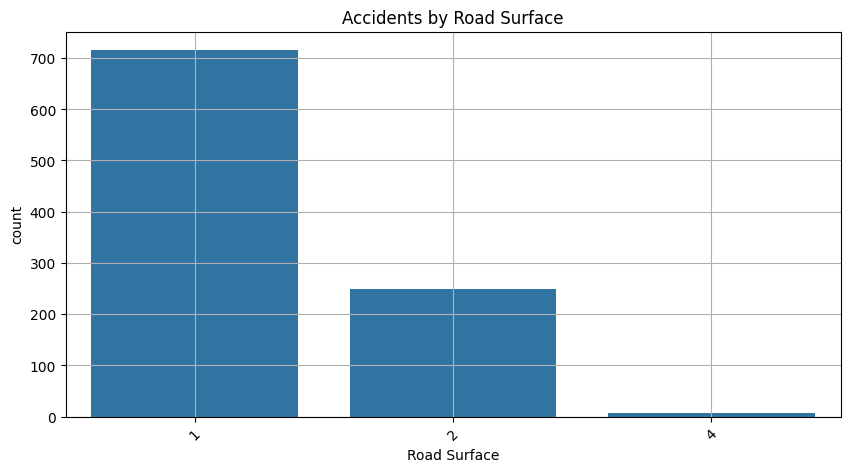

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Road Surface', order=df['Road Surface'].value_counts().index)
plt.title("Accidents by Road Surface")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


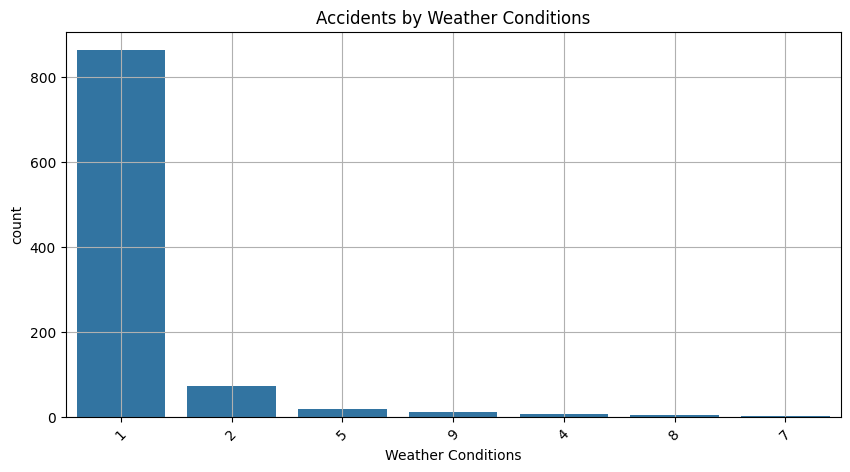

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Weather Conditions', order=df['Weather Conditions'].value_counts().index)
plt.title("Accidents by Weather Conditions")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


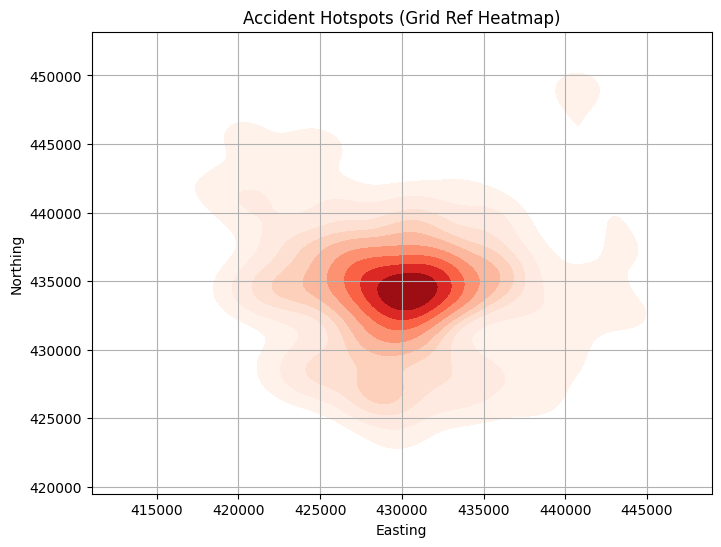

In [ ]:
df = df.dropna(subset=['Grid Ref: Easting', 'Grid Ref: Northing'])

plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df['Grid Ref: Easting'],
    y=df['Grid Ref: Northing'],
    cmap="Reds", fill=True, thresh=0.05
)
plt.title("Accident Hotspots (Grid Ref Heatmap)")
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.grid(True)
plt.show()
